In [120]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.optimize import curve_fit
%matplotlib inline

In [121]:
def SubSet(X, Y, y_max = 10, offset = 3):
    y_min = np.min(Y) - offset
    mask = np.bitwise_and(Y > y_min, Y < y_max)
    return X[mask], Y[mask]

In [122]:
# 5nm Radius

surface_5_data     = np.genfromtxt('surface_5.dat')
surface_5_distance = surface_5_data[:,0]
surface_5_energy   = surface_5_data[:,1]

core_5_data        = np.genfromtxt('core_5.dat')
core_5_distance    = core_5_data[:,0]
core_5_energy      = core_5_data[:,1]

both_5_data        = np.genfromtxt('both_5.dat')
both_5_distance    = both_5_data[:,0]
both_5_energy      = both_5_data[:,1]

# 50nm Raduis

surface_50_data     = np.genfromtxt('surface_50.dat')
surface_50_distance = surface_50_data[:,0]
surface_50_energy   = surface_50_data[:,1]

core_50_data        = np.genfromtxt('core_50.dat')
core_50_distance    = core_50_data[:,0]
core_50_energy      = core_50_data[:,1]

both_50_data        = np.genfromtxt('both_50.dat')
both_50_distance    = both_50_data[:,0]
both_50_energy      = both_50_data[:,1]

In [123]:
surface_5_distance, surface_5_energy = SubSet(surface_5_distance, surface_5_energy)
core_5_distance, core_5_energy = SubSet(core_5_distance, core_5_energy)
both_5_distance, both_5_energy = SubSet(both_5_distance, both_5_energy)

surface_50_distance, surface_50_energy = SubSet(surface_50_distance, surface_50_energy)
core_50_distance, core_50_energy = SubSet(core_50_distance, core_50_energy)
both_50_distance, both_50_energy = SubSet(both_50_distance, both_50_energy)

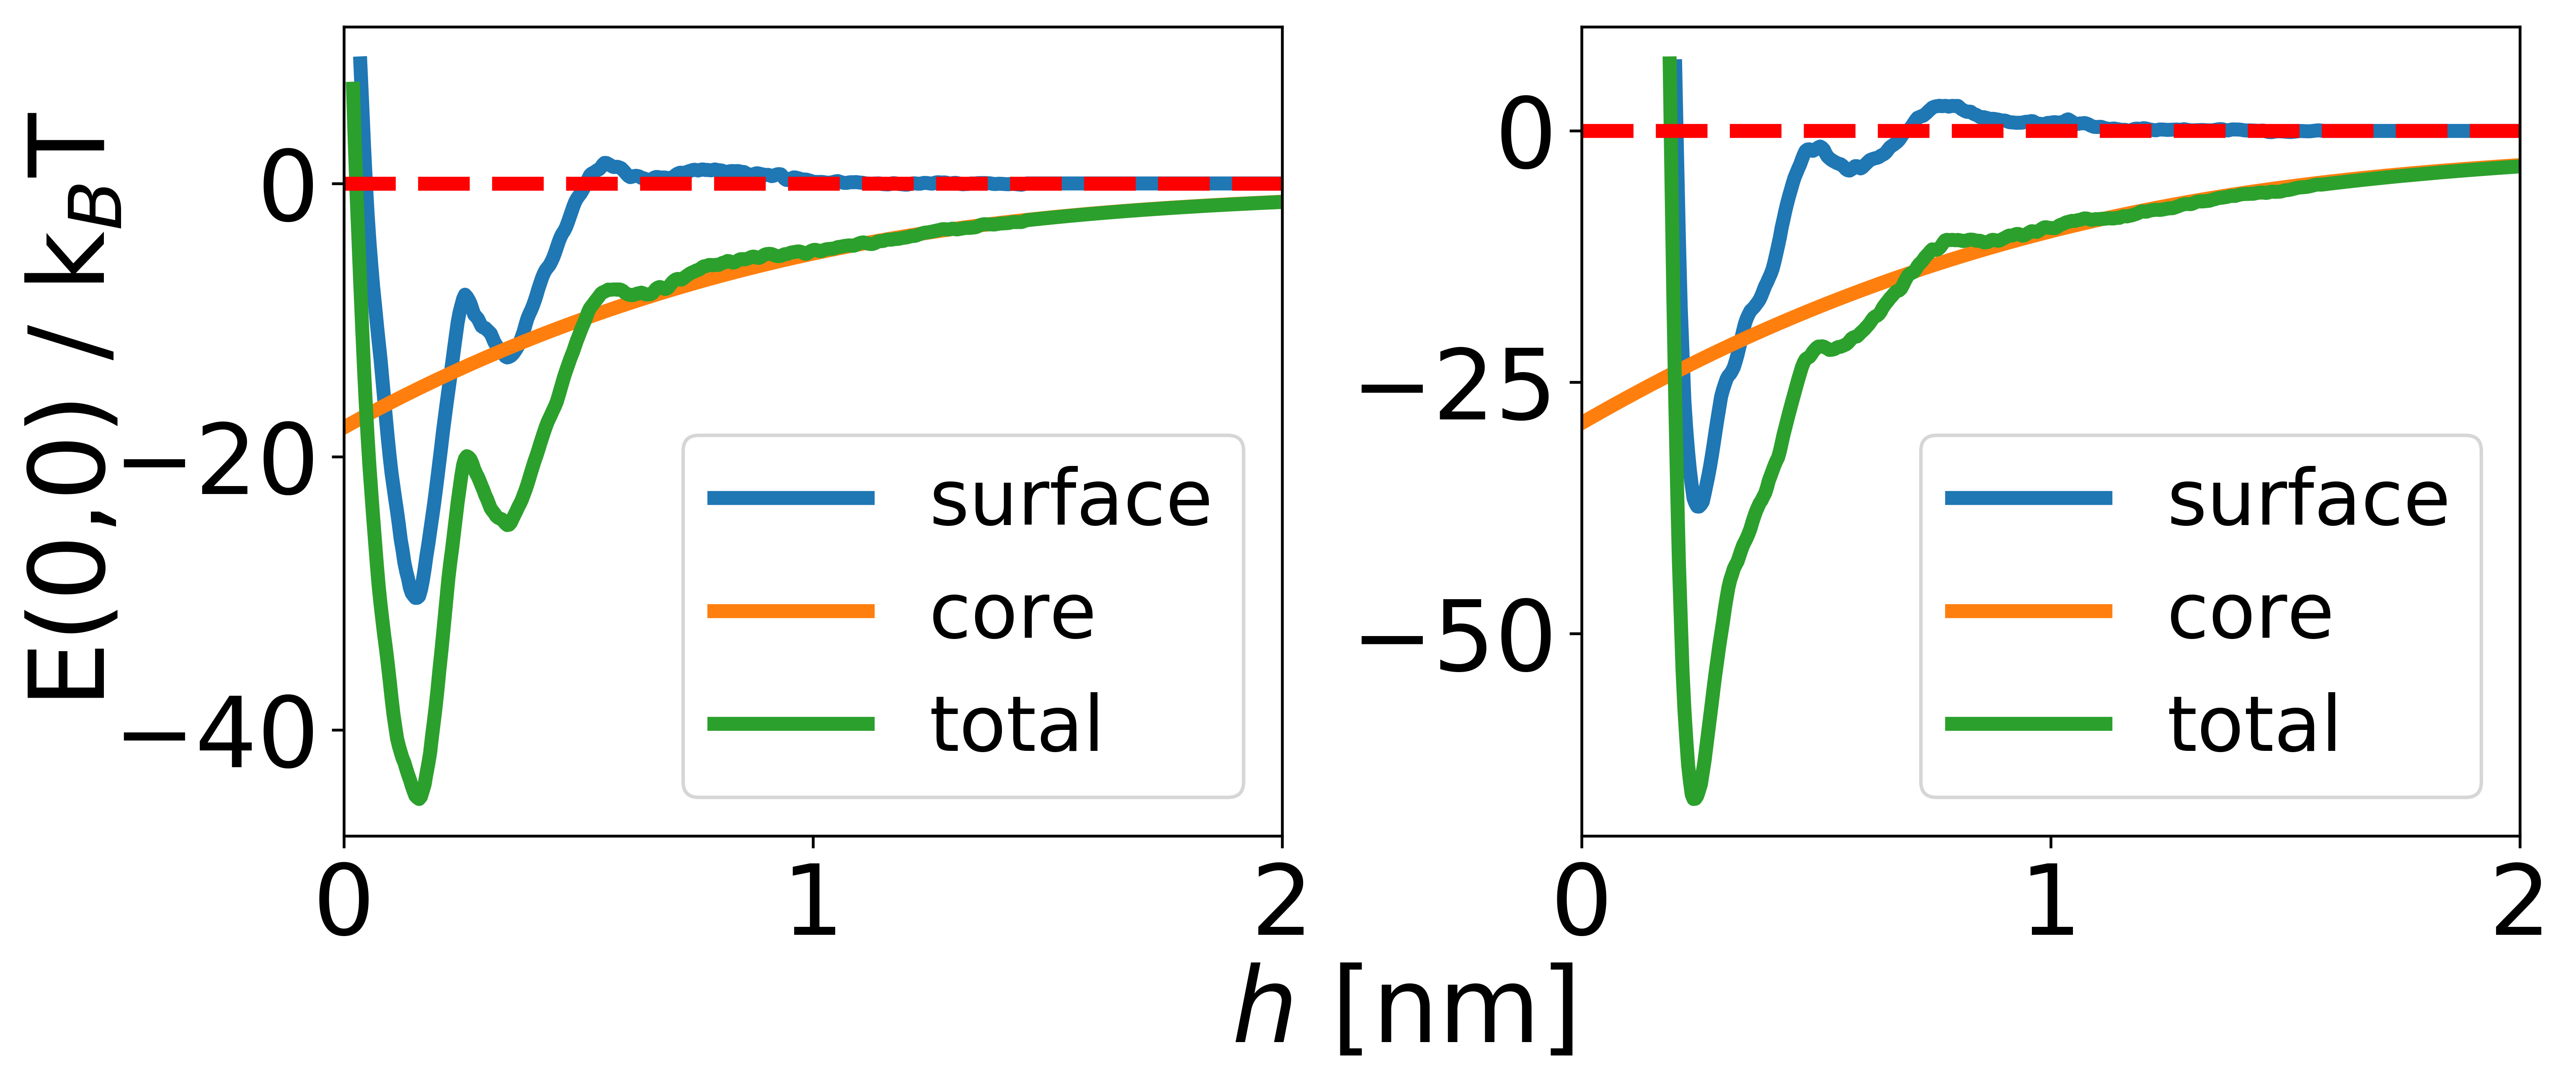

In [156]:
scale     = 1.0
dpi       = 600
fontsize  = 30
linewidth = 4
xlabel    = r"$h$ [nm]"
ylabel    = r"E(0,0) / k$_B$T"

fig = plt.figure(figsize = plt.figaspect(0.4) * scale, dpi = dpi)

ax1 = fig.add_subplot(1, 2, 1)
a1, = ax1.plot(surface_5_distance, surface_5_energy, linewidth = linewidth)
b1, = ax1.plot(core_5_distance, core_5_energy, linewidth = linewidth)
c1, = ax1.plot(both_5_distance, both_5_energy, linewidth = linewidth)
ax1.plot(np.linspace(np.min(core_5_distance), np.max(core_5_distance), 1000), [0] * 1000, 'r--', linewidth = linewidth)
ax1.legend([a1, b1, c1],['surface', 'core', 'total'], fontsize = fontsize - 8)
ax1.set_xlim(0.0, 2.0)
ax1.tick_params(labelsize = fontsize - 2)

ax2 = fig.add_subplot(1, 2, 2)
a2, = ax2.plot(surface_50_distance, surface_50_energy, linewidth = linewidth)
b2, = ax2.plot(core_50_distance, core_50_energy, linewidth = linewidth)
c2, = ax2.plot(both_50_distance, both_50_energy, linewidth = linewidth)
ax2.plot(np.linspace(np.min(core_50_distance), np.max(core_50_distance), 1000), [0] * 1000, 'r--', linewidth = linewidth)
#ax2.set_xlabel(xlabel, fontsize = fontsize)
ax2.legend([a1, b1, c1],['surface', 'core', 'total'], fontsize = fontsize - 8)
ax2.set_xlim(0.0, 2.0)
ax2.tick_params(labelsize = fontsize - 2)

fig.text(0.46, -0.02, xlabel, va = 'center', fontsize = fontsize)
fig.text(-0.02, 0.58, ylabel, va = 'center', rotation = 'vertical', fontsize = fontsize)

fig.tight_layout()

#fig.savefig('surface_core_comparison.png')

In [113]:
def GuessFit(R, E0, E1, R0, n):
    #return E0 + E1 * (1.0 - np.exp(np.exp( -0.691 * (R / R0) ** 2))) 
    return E0 + E1 / (R0 + R)**2


class Curve:
    def __init__(self, fontsize, color, infinity_limit = 500):
        self._fontsize          = fontsize
        self._color             = color
        self._infinity_limit    = infinity_limit
        self._x                 = np.empty(shape = (0))
        self._y                 = np.empty(shape = (0))
        self._sd                = np.empty(shape = (0))
        self._y_inf             = None

    def Append(self, x, y, sd):
        if x > self._infinity_limit:
            self._y_inf = y
        else:
            self._x  = np.append(self._x, x)
            self._y  = np.append(self._y, y)
            self._sd = np.append(self._sd, sd)

    def Plot(self):
        (E0, E1, R0, n), cov = curve_fit(GuessFit, self._x, self._y, p0 = (-200.0, self._y_inf, 30.0, .5))

        print(E0, E1, R0, n)

        fit_x = np.linspace(self._x[0], self._x[-1], 1000)
        fit_y = GuessFit(fit_x, E0, E1,  R0, n)

        residuals = self._y - GuessFit(self._x, E0, E1, R0, n)
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((self._y - np.mean(self._y))**2)
        r_squared = 1 - (ss_res / ss_tot)
        print("R-Squared: {}".format(r_squared))

        plt.errorbar(self._x, self._y, fmt = 'o' + self._color, yerr = 2.0 * self._sd, ecolor = 'k', capsize = 3,capthick = 1)
        plt.semilogx(fit_x, fit_y, '-m', linewidth = 2)
        flat, = plt.semilogx(fit_x, [self._y_inf] * 1000, 'r--', linewidth = 2)
        
        plt.legend([flat], ['flat'], fontsize = self._fontsize)
        
        #plt.plot(fit_x, fit_y, '-' + self._color)
        #plt.plot(fit_x, [self._y_inf] * 1000, 'r--')

(-238.05915847456035, 11315.5269250005, 6.040774021852098, 0.5)
R-Squared: 0.991457812613


Text(0,0.5,'E$_{ad}$ / k$_B$T')

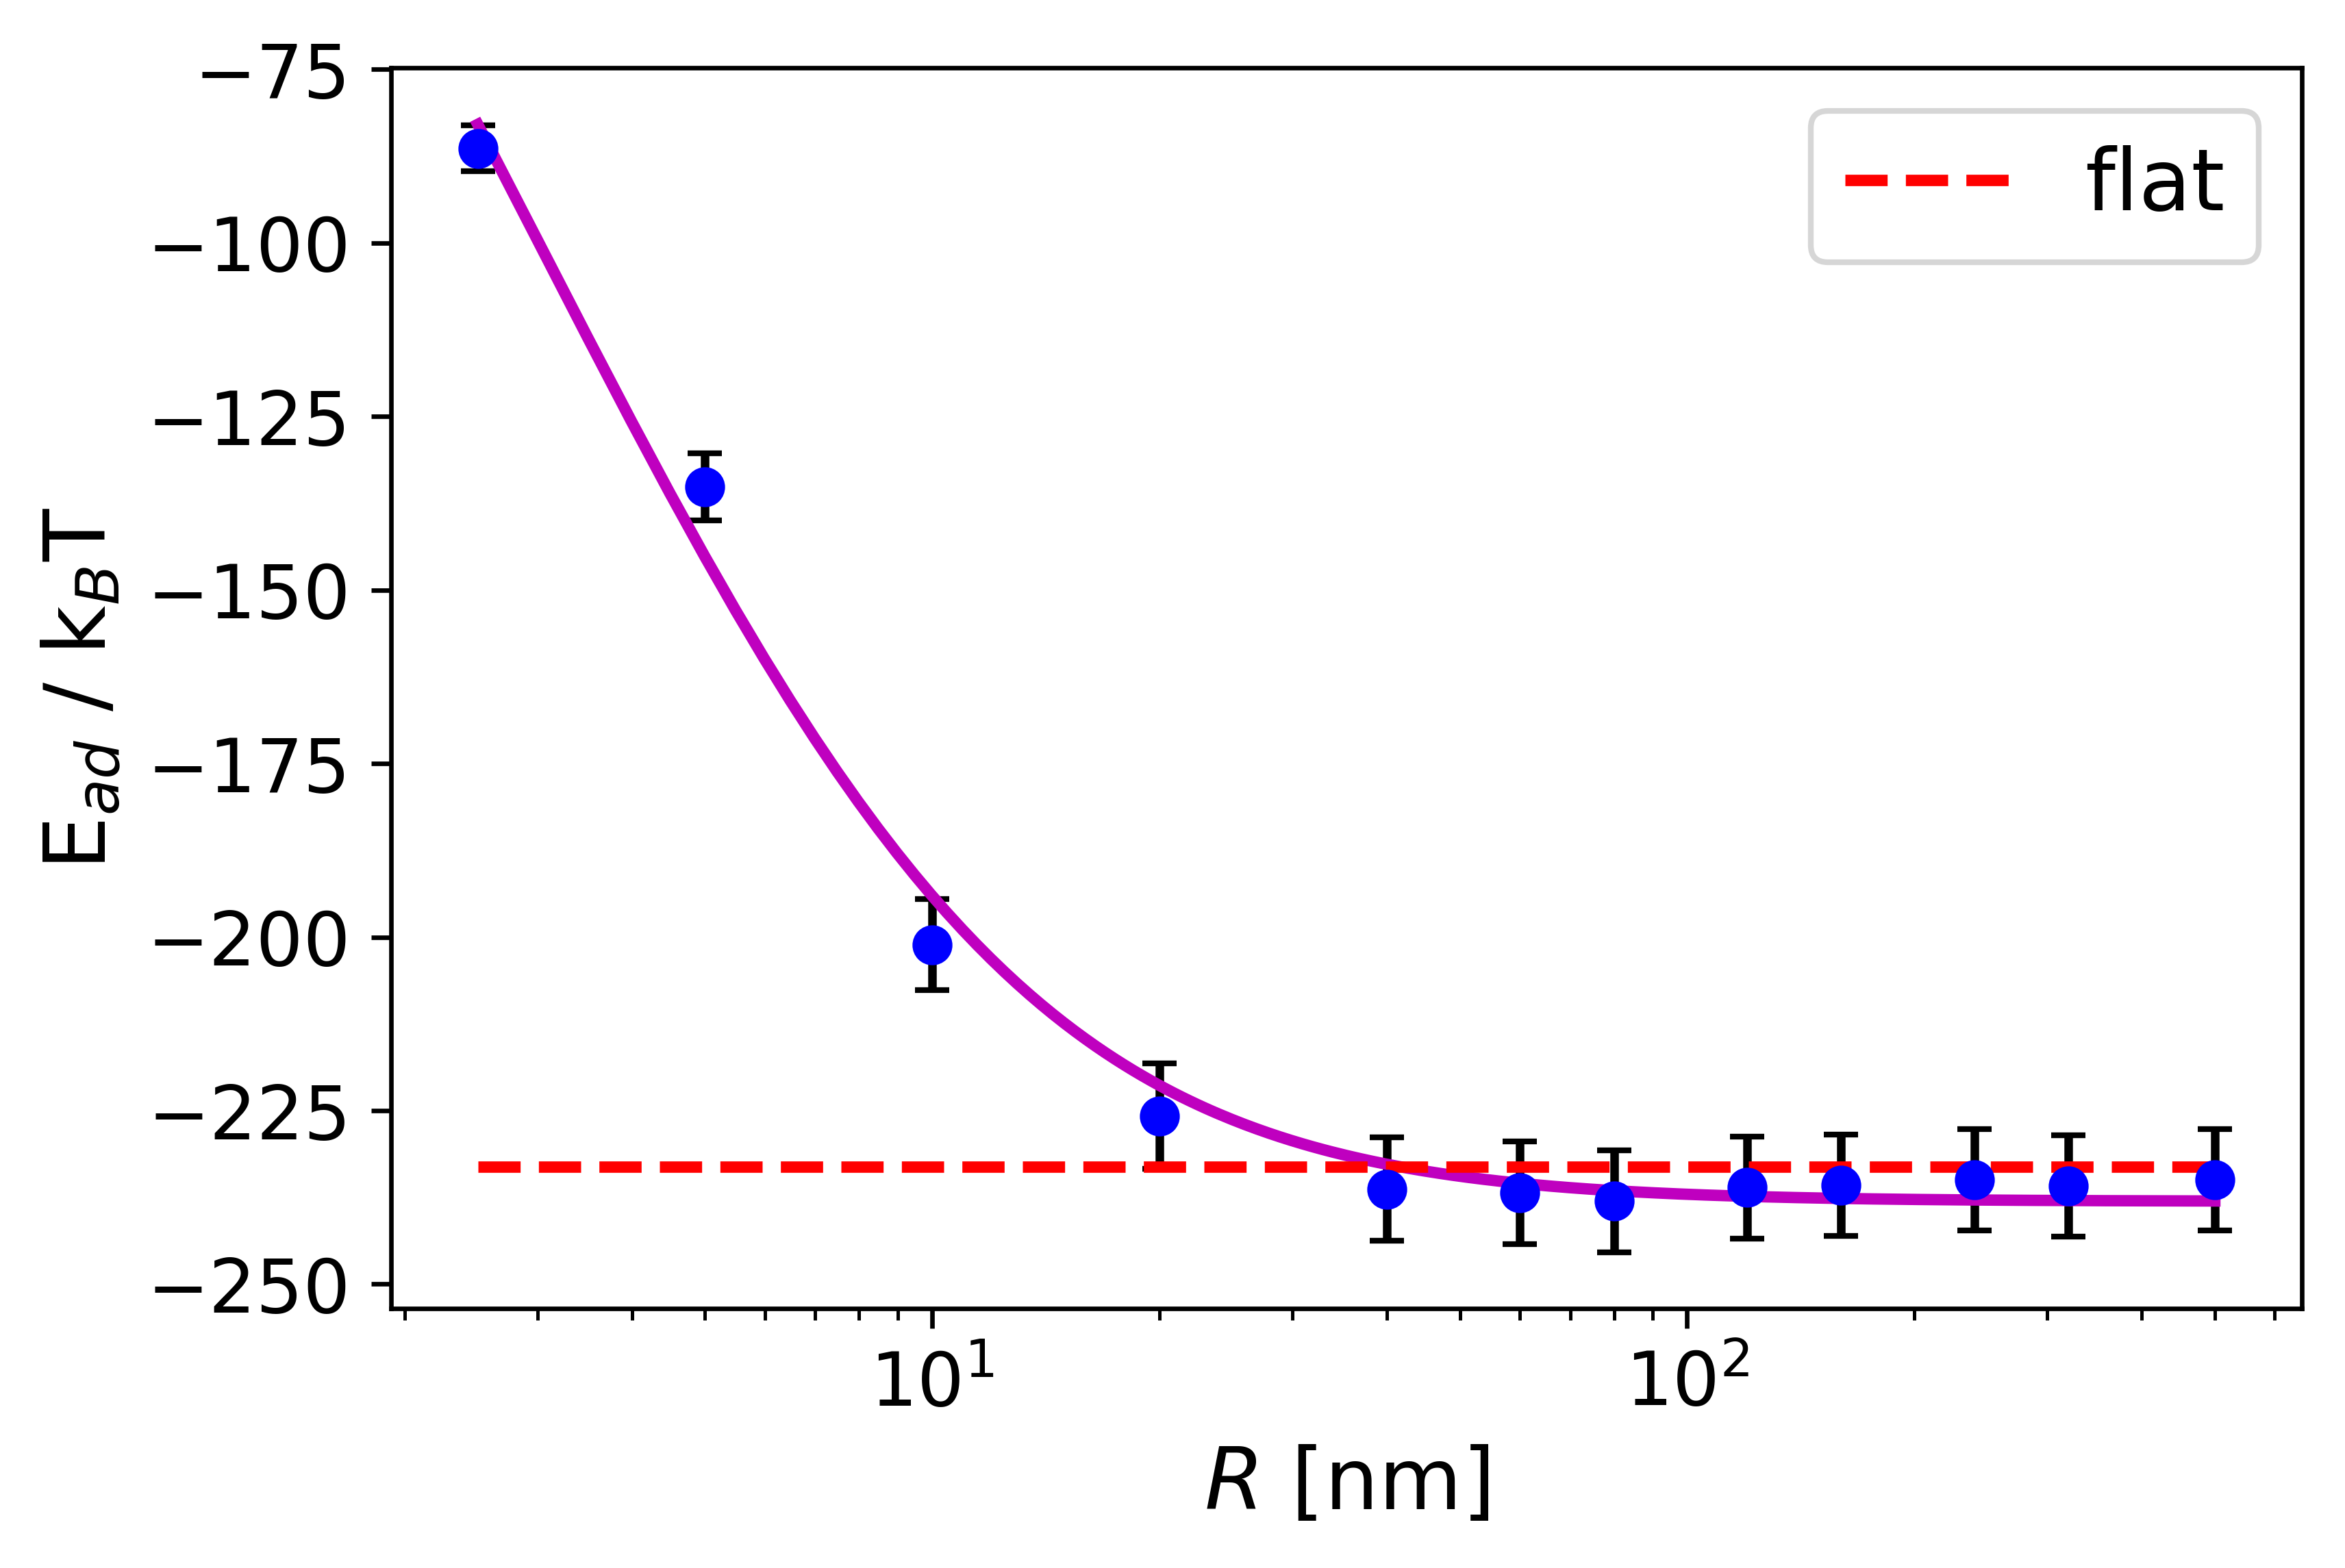

In [114]:
plt.figure(dpi = 600)

data            = np.genfromtxt('1n5u.out')
fontsize        = 15
zeta_0          = Curve(fontsize, 'b')

for i in range( data.shape[0]):
    zeta_0.Append(data[i][1], data[i][3], data[i][4])

zeta_0.Plot()

plt.tick_params(labelsize = fontsize - 2)
plt.xlabel(r'$R$ [nm]', fontsize = fontsize)
plt.ylabel('E$_{ad}$ / k$_B$T', fontsize = fontsize)